<a href="https://colab.research.google.com/github/ariana-caetano/estudos-em-Python/blob/main/AnaliseChun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Churn

O Churn é uma forma utilizada pelas empresas para calcular a taxa de cancelamento ou desistência de clientes. Por exemplo, empresas como a Netflix, Vivo, Tim, podem querer identificar quantas pessoas estão cancelando suas assinaturas, o porquê e como podem tomar alguma atitude para evitar que isso aconteça.
Para realizar essa análise usam o índice de Churn.

Para entender um pouco sobre como analisar, e o que pode ser extraído dessa métrica vamos utilizar uma base extraída do [Kaggle](https://www.kaggle.com/datasets/blastchar/telco-customer-churn) e assim utilizá-la para nosso aprendizado de ciência de dados.

#### Importando os dados

In [ ]:
import pandas as pd
#para criação dos gráficos
import matplotlib.pyplot as plt
import seaborn as sns

#para machine learning
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

#LogisticRegression
from sklearn.linear_model import LogisticRegression
#RandomForest
from sklearn.ensemble import RandomForestClassifier
#GradientBoosting
from sklearn.ensemble import GradientBoostingClassifier
#XGBoost
from xgboost import XGBClassifier
#DecisionTree
from sklearn.tree import DecisionTreeClassifier
#LGBMClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import roc_auc_score,roc_curve

#tensorflow Rede Neural
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy   



In [ ]:
#carregando o arquivo .csv com os daddos
from google.colab import files
arquivo = files.upload()


Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn (2).csv


In [ ]:
dados = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

dados.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


#### Analisando os dados

Agora iremos analisar um pouco dos dados que temos na nossa base:
* as colunas
* os tipos cada variável (numérica, categórica, temporal)
* quais as variáveis mais adequadas à nossa análise

In [ ]:
pd.DataFrame.info(dados)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Como é possível observar temos um total de 21 colunas e 7043 linhas, temos poucas colunas numéricas e não temos valores nulos. O conjunto de dados é de uma empresa de telecomunicações e há informações dos clientes, de seus dependentes, do seus serviços contratados, métodos de pagamento e a coluna que é do nosso interesse nesse estudo **Churn** que nos mostra quem cancelou a contratação do serviço prestado pela empresa.

Vamos iniciar realizando alguns gráficos dos nossos dados e ver se conseguimos extrair alguma relação com a taxa de churn.

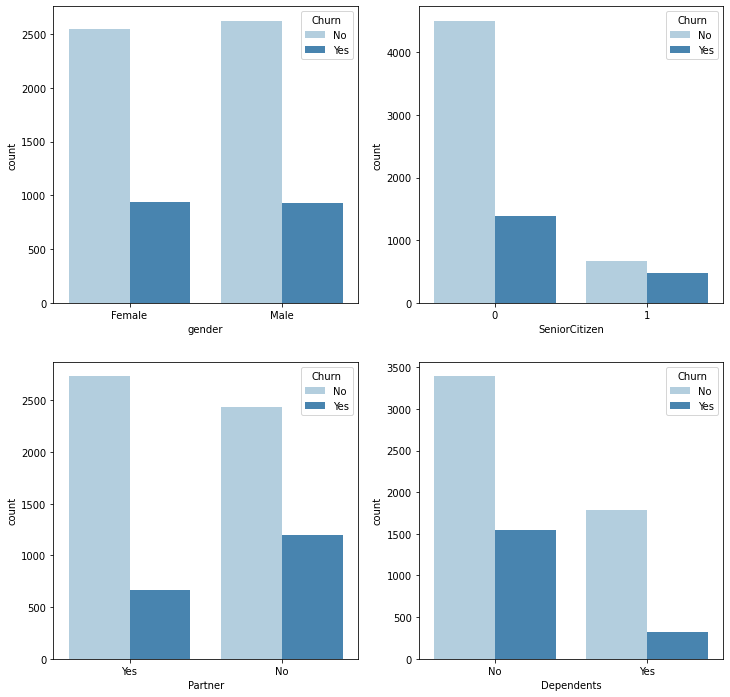

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12,12))

sns.countplot(x ='gender', hue = "Churn", data = dados, ax=axes[0,0], palette='Blues')
sns.countplot(x ='SeniorCitizen', hue = "Churn", data = dados, ax=axes[0,1], palette='Blues')
sns.countplot(x ='Partner', hue = "Churn", data = dados, ax=axes[1,0], palette='Blues')
sns.countplot(x ='Dependents', hue = "Churn", data = dados, ax=axes[1,1], palette='Blues')
         

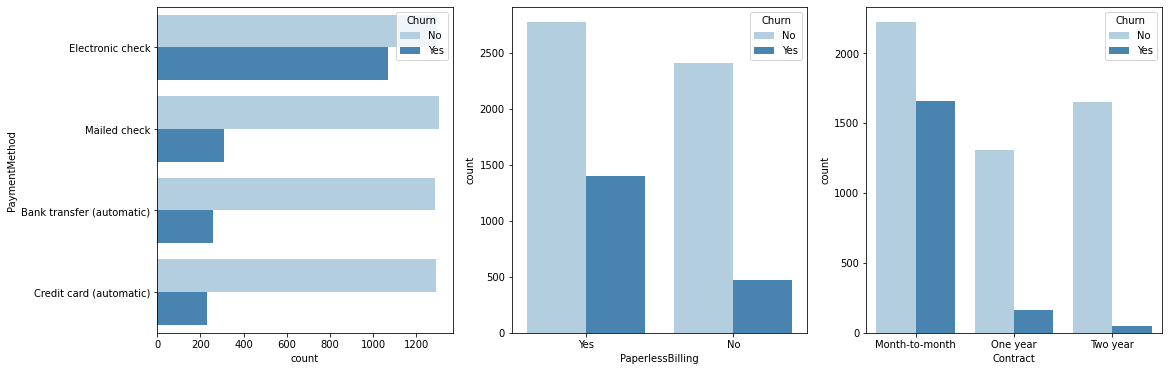

In [ ]:
fig1, ax = plt.subplots(1, 3, figsize=(18,6))
sns.countplot(y ='PaymentMethod', hue = "Churn", data = dados, ax=ax[0], palette='Blues')
sns.countplot(x ='PaperlessBilling', hue = "Churn", data = dados, ax=ax[1], palette='Blues')
sns.countplot(x ='Contract', hue = "Churn", data = dados, ax=ax[2], palette='Blues')

Não há nada muito óbvio nos dados, pelo menos para mim que estou começando meus estudos, as minhas únicas observações são com relação ao método de pagamento (**PaymentMethod**) que apresentou maior churn para os clientes que utilizam Eletronic check. E para os (**SeniorCitizen**) que são em número pequeno, mas apresentam um alto churn.
E para (**Contract**) a modalidade Month-to-month também apresentou maior churn.

As colunas:

**PhoneService, MultipleLines, InternetService, OnlineSecurity, DeviceProtection, TechSupport, StreamingTV, StreamingMovies** são serviços que podem ser contratados pelos clientes da empresa de Telecomunicação.
Podemos fazer uma análise e verificar quais serviços são mais contratados, se existe algum deles com maior taxa de cancelamento, se os clientes costumam contratar mais de um serviço....vamos explorar um pouquinho


In [ ]:
# verificar as categorias presentes na coluna (sem repetição)
print(set(dados['PhoneService']))
print(set(dados['MultipleLines']))
print(set(dados['InternetService']))
print(set(dados['OnlineSecurity']))
print(set(dados['DeviceProtection']))
print(set(dados['TechSupport']))
print(set(dados['StreamingTV']))
print(set(dados['StreamingMovies']))
print(set(dados['Churn']))


{'Yes', 'No'}
{'Yes', 'No phone service', 'No'}
{'Fiber optic', 'DSL', 'No'}
{'Yes', 'No internet service', 'No'}
{'Yes', 'No internet service', 'No'}
{'Yes', 'No internet service', 'No'}
{'Yes', 'No internet service', 'No'}
{'Yes', 'No internet service', 'No'}
{'Yes', 'No'}


In [ ]:
#verififar a quantidade que existe de cada valor único
print(dados['PhoneService'].value_counts())
print(dados['MultipleLines'].value_counts())
print(dados['InternetService'].value_counts())
print(dados['OnlineSecurity'].value_counts())
print(dados['DeviceProtection'].value_counts())
print(dados['TechSupport'].value_counts())
print(dados['StreamingTV'].value_counts())
print(dados['StreamingMovies'].value_counts())
print(dados['Churn'].value_counts())

Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64
No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64
No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64
No     5174
Yes    1869
Name: Churn, dtype: int64


O serviço mais contratado é **PhoneService** com 6361 clientes e o menos contratado é o **MultipleLines** com 4072 não adesões ao serviço, e o nosso **Churn** tem 1869 clientes. Vamos verificar se é possível extrair alguma relação entre o serviço contratado e a taxa de cancelamento (churn).

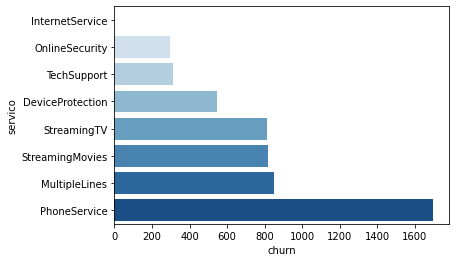

In [ ]:

phone_churn = dados[(dados.PhoneService == 'Yes') & (dados.Churn == 'Yes')]
multipleLines_churn = dados[(dados.MultipleLines == 'Yes') & (dados.Churn == 'Yes')]
internet_churn = dados[(dados.InternetService == 'Yes') & (dados.Churn == 'Yes')]
onlineSec_churn = dados[(dados.OnlineSecurity == 'Yes') & (dados.Churn == 'Yes')]
devProtection_churn = dados[(dados.DeviceProtection == 'Yes') & (dados.Churn == 'Yes')]
techSupport = dados[(dados.TechSupport == 'Yes') & (dados.Churn == 'Yes')]
tv_churn = dados[(dados.StreamingTV == 'Yes') & (dados.Churn == 'Yes')]
movies_churn = dados[(dados.StreamingMovies == 'Yes') & (dados.Churn == 'Yes')]

dic = {
    'servico': ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'],
    'churn': [len(phone_churn), len(multipleLines_churn), len(internet_churn), len(onlineSec_churn), len(devProtection_churn), len(techSupport), len(tv_churn), len(movies_churn)]
}

df = pd.DataFrame(dic)

sns.barplot(x='churn', y='servico', data=df, order=df.sort_values('churn').servico, palette='Blues')




A maior taxa de cancelamento está em PhoneService, mas os dados ainda não são muito precisos já que um mesmo cliente pode contratar mais de um serviço ao mesmo tempo. Mas podemos afirmar que em InternetService não há cancelamentos, já que o número de pessoas que tem esse serviço contratado e teve Churn é igual a zero.




            servico  churn
0      PhoneService    347
1     MultipleLines      0
2   InternetService      0
3    OnlineSecurity      7
4  DeviceProtection      7
5       TechSupport      8
6       StreamingTV     11
7   StreamingMovies     15


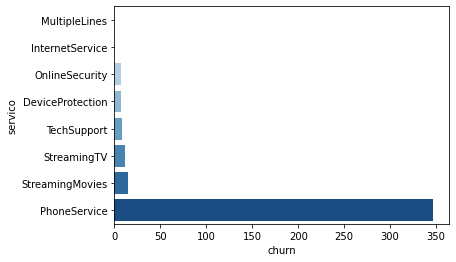

In [ ]:
somente_phone_churn = dados[(dados.PhoneService == 'Yes') & 
                    (dados.Churn == 'Yes') & 
                    (dados.MultipleLines != 'Yes') &
                    (dados.InternetService != 'Yes') &
                    (dados.OnlineSecurity != 'Yes') &
                    (dados.DeviceProtection != 'Yes') &
                    (dados.TechSupport != 'Yes') &
                    (dados.StreamingTV != 'Yes') &
                    (dados.StreamingMovies != 'Yes')]

somente_MultipleLines_churn = dados[(dados.MultipleLines == 'Yes') & 
                    (dados.Churn == 'Yes') & 
                    (dados.PhoneService != 'Yes') &
                    (dados.InternetService != 'Yes') &
                    (dados.OnlineSecurity != 'Yes') &
                    (dados.DeviceProtection != 'Yes') &
                    (dados.TechSupport != 'Yes') &
                    (dados.StreamingTV != 'Yes') &
                    (dados.StreamingMovies != 'Yes')]

somente_InternetService_churn = dados[(dados.InternetService == 'Yes') & 
                    (dados.Churn == 'Yes') & 
                    (dados.PhoneService != 'Yes') &
                    (dados.MultipleLines != 'Yes') &
                    (dados.OnlineSecurity != 'Yes') &
                    (dados.DeviceProtection != 'Yes') &
                    (dados.TechSupport != 'Yes') &
                    (dados.StreamingTV != 'Yes') &
                    (dados.StreamingMovies != 'Yes')]  
somente_OnlineSecurity_churn = dados[(dados.OnlineSecurity == 'Yes') & 
                    (dados.Churn == 'Yes') & 
                    (dados.MultipleLines != 'Yes') &
                    (dados.InternetService != 'Yes') &
                    (dados.PhoneService != 'Yes') &
                    (dados.DeviceProtection != 'Yes') &
                    (dados.TechSupport != 'Yes') &
                    (dados.StreamingTV != 'Yes') &
                    (dados.StreamingMovies != 'Yes')] 
somente_DeviceProtection_churn = dados[(dados.DeviceProtection == 'Yes') & 
                    (dados.Churn == 'Yes') & 
                    (dados.MultipleLines != 'Yes') &
                    (dados.InternetService != 'Yes') &
                    (dados.OnlineSecurity != 'Yes') &
                    (dados.PhoneService != 'Yes') &
                    (dados.TechSupport != 'Yes') &
                    (dados.StreamingTV != 'Yes') &
                    (dados.StreamingMovies != 'Yes')]

somente_TechSupport_churn = dados[(dados.TechSupport == 'Yes') & 
                    (dados.Churn == 'Yes') & 
                    (dados.MultipleLines != 'Yes') &
                    (dados.InternetService != 'Yes') &
                    (dados.OnlineSecurity != 'Yes') &
                    (dados.DeviceProtection != 'Yes') &
                    (dados.PhoneService != 'Yes') &
                    (dados.StreamingTV != 'Yes') &
                    (dados.StreamingMovies != 'Yes')]

somente_StreamingTV_churn = dados[(dados.StreamingTV == 'Yes') & 
                    (dados.Churn == 'Yes') & 
                    (dados.MultipleLines != 'Yes') &
                    (dados.InternetService != 'Yes') &
                    (dados.OnlineSecurity != 'Yes') &
                    (dados.DeviceProtection != 'Yes') &
                    (dados.TechSupport != 'Yes') &
                    (dados.PhoneService != 'Yes') &
                    (dados.StreamingMovies != 'Yes')]

somente_StreamingMovies_churn = dados[(dados.StreamingMovies == 'Yes') & 
                    (dados.Churn == 'Yes') & 
                    (dados.MultipleLines != 'Yes') &
                    (dados.InternetService != 'Yes') &
                    (dados.OnlineSecurity != 'Yes') &
                    (dados.DeviceProtection != 'Yes') &
                    (dados.TechSupport != 'Yes') &
                    (dados.StreamingTV != 'Yes') &
                    (dados.PhoneService != 'Yes')]          

dic = {
    'servico': ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'],
    'churn': [len(somente_phone_churn), 
              len(somente_MultipleLines_churn), 
              len(somente_InternetService_churn), 
              len(somente_OnlineSecurity_churn), 
              len(somente_DeviceProtection_churn), 
              len(somente_TechSupport_churn), 
              len(somente_StreamingTV_churn), 
              len(somente_StreamingMovies_churn)]
}

df_unicos = pd.DataFrame(dic)

sns.barplot(x='churn', y='servico', data=df_unicos, order=df_unicos.sort_values('churn').servico, palette='Blues')  

print(df_unicos)


O gráfico acima mostra a taxa de cancelamento pra cada um dos serviços, mas somente para os clientes que possuem apenas aquele serviço contratado, por exemplo: PhoneService tem 6361 contratações, o total de cancelamento é de 1699, mas apenas 347 cancelamentos são de clientes que só possuíam esse serviço.

| Serviços  | Total contratações  | Total Cancelamentos  | Cancelamentos (única contratação) |   |
|:-:|:-:|:-:|:-:|---|
|PhoneService   | 6361  | 1699  | 347  |   |
|MultipleLines  | 2971  | 850  | 0  |   |
|InternetService   | 5517  | 0  | 0  |   |
|OnlineSecurity   | 2019  | 295  | 7  |   |
|DeviceProtection   | 2422  | 545  | 7  |   |
|TechSupport   | 2044  | 310  | 0  |   |
|StreamingTV   | 2707  | 814  | 11  |   |
|StreamingMovies   | 2732  | 818  | 15  |   |


Do total de 1869 cancelamentos, apenas 387 são de pessoas que possuíam apenas um serviço contratado. Apesar de não termos os valores de custo de cada serviço, já podemos imaginar impactos na receita da empresa, pois a maioria dos cancelamentos que aconteceram são de pelo menos 2 serviços simultaneamente.

Apesar de conseguir entender um pouco sobre os dados, é muito difícil prever e saber quais os motivos levam ao cancelamento de um serviço apenas com a análise exploratória dos dados. 
Sendo assim, qualquer mecanismo que possa ajudar nessa tarefa é de grande valia, e por isso vamos fazer um estudo de alguns modelos de machine learning.

# Machine Learning

**1. TensorFlow**

TensorFlow é uma biblioteca de código aberto criada para aprendizado de máquina. Foi desenvolvido pelo Google em 2015 e rapidamente se tornou uma das principais ferramentas para machine learning e deep learning.

Depois que o TensorFlow está instalado, você pode utilizar a mesma interface (IDE) que utiliza para programar Python para rodar seus códigos TensorFlow. É como se o TensorFlow fosse uma biblioteca Python, da mesma forma que temos os pacotes/bibliotecas Numpy, Scikit-learn, Pandas, etc.

O TensorFlow possui funções prontas de estruturas de redes neurais dos mais variados tipos (redes neurais recorrentes, redes convolucionais, LSTMs, funções de ativação, técnicas de regularização, otimizadores, funções de custo, etc.). Em outras palavras, todos os recursos teóricos que estudarmos sobre redes neurais, deep learning, processamento de linguagem natural, visão computacional, etc., podem ser facilmente implementados no TensorFlow, basta invocar as funções e módulos certos, passando as configurações adequadas.

Mais informações sobre o TensorFlow e o link de onde tirei a informação acima [clique aqui](https://didatica.tech/o-que-e-tensorflow-para-que-serve/)

Após essa descrição, que achei muito relevante colocar aqui, para entendermos um pouco sobre a ferramenta que utilizaremos, vamos ao código:

In [ ]:
#separando uma parte dos nossos dados originais para usar na validação
#vamos definir cerca de 1% da nossa base, de aproximadamente 7000 registros pegaremos 70
df_validacao = dados.iloc[:70] #guardamos as 70 primeiras linhas

#vamos fazer uma cópia do nosso dataset para fazer algumas transformações no dados
df_clean = dados.copy()



In [ ]:
#fazendo um tratamento na base de dados para ficar mais adequada para aplicar o modelo de machine learning
#o campo customerID não será utilizado e será deletado
df_clean.drop('customerID', 1, inplace=True)

#o campo TotalCharges é do tipo object e transformaremos em float
#vamos forçar a tranformação ignorando erros com o 'coerce'
df_clean.TotalCharges = pd.to_numeric(df_clean.TotalCharges, errors='coerce')

df_clean.dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [ ]:
#como a transformação de object para float foi forçada é necessário verificar se alguma linha está nula
df_clean[df_clean.TotalCharges.isna()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [ ]:
#o múmero de nulos é pequeno perto do tamanho total do dataset e vamos deletá-los
df_clean.dropna(subset=['TotalCharges'], inplace=True)

#verificando se foram deletados
df_clean[df_clean.TotalCharges.isna()]
#os dados NaN podem ser tratados de maneiras diferentes e nem sempre devem ser deletados


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


Agora vamos padronizar as variáveis categóricas (não-numéricas) e também fazer algumas transformações para numérico já que estamos trabalhando com um modelo matemático.

 

*   a coluna Churn (YES, NO) será transformada utilizando o LabelEnconder, em 0 e 1;
*   as outras colunas serão transformadas em dummies.




In [ ]:
# já usamos esse código anteriormente e vamos relembrar quais são os valores únicos nas nossas colunas
# mas agora de forma mais automática (usando um for)
for i in df_clean:
  print(i, set(df_clean[i]))


gender {'Female', 'Male'}
SeniorCitizen {0, 1}
Partner {'Yes', 'No'}
Dependents {'Yes', 'No'}
tenure {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72}
PhoneService {'Yes', 'No'}
MultipleLines {'Yes', 'No phone service', 'No'}
InternetService {'Fiber optic', 'DSL', 'No'}
OnlineSecurity {'Yes', 'No internet service', 'No'}
OnlineBackup {'Yes', 'No internet service', 'No'}
DeviceProtection {'Yes', 'No internet service', 'No'}
TechSupport {'Yes', 'No internet service', 'No'}
StreamingTV {'Yes', 'No internet service', 'No'}
StreamingMovies {'Yes', 'No internet service', 'No'}
Contract {'Month-to-month', 'Two year', 'One year'}
PaperlessBilling {'Yes', 'No'}
PaymentMethod {'Electronic check', 'Bank transfer (automatic)', 'Credit card (automatic)', 'Mailed check'}
Mo

In [ ]:
#padronizando para No
df_clean.replace('No phone service','No', inplace=True)
df_clean.replace('No internet service','No', inplace=True)

#transformar os campos que contém texto para 0 e 1 (dummies)
df_numerico = pd.get_dummies(data=df_clean, columns=['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod'])

#transformando o Churn em 0 e 1
label_enc = LabelEncoder()
df_numerico['Churn'] = label_enc.fit_transform(df_numerico['Churn'])

#normalizando os dados numéricos
scaler = MinMaxScaler()
df_numerico[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(df_numerico[['tenure', 'MonthlyCharges','TotalCharges']])


In [ ]:
# Separando as variáveis independentes e a variável objetivo Churn
X = df_numerico.drop('Churn', axis=1)
y = df_numerico['Churn']

#usaremos para fazer uma validação com as 10 primeiras linhas
validacao = X.head(70)

#Removendo da base as 70 primeiras linhas reservadas anteriormente em validacao
X = X.iloc[70:]
y = y.iloc[70:]

# Separando o conjunto de dados em treino e teste
#não me profundei nos parâmetro passados para a criação do modelo 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=2)

#Montando o modelo
#input_shape = qtde de colunas na nossa tabela
#20 qtde de neurônios
#relu é o mais utilizado (função não linear)
#sigmoid saída em 0 ou 1
modelo_tensor = Sequential([
          Dense(20, input_shape=(39,), activation='relu'),
          Dense(52, activation ='relu'),
          Dense(1, activation ='sigmoid')#camada de saída
])

#Parâmetros de execução
modelo_tensor.compile(optimizer ='adam',
               loss = 'binary_crossentropy',
               metrics = ['accuracy'])

In [ ]:
#treinamento 
modelo_tensor.fit(X_train, y_train, epochs=100)

Epoch 1/100
175/175 [==============================] - 1s 2ms/step - loss: 0.5404 - accuracy: 0.7120
Epoch 2/100
175/175 [==============================] - 0s 2ms/step - loss: 0.4297 - accuracy: 0.7933
Epoch 3/100
175/175 [==============================] - 0s 2ms/step - loss: 0.4196 - accuracy: 0.8001
Epoch 4/100
175/175 [==============================] - 0s 2ms/step - loss: 0.4166 - accuracy: 0.8014
Epoch 5/100
175/175 [==============================] - 0s 2ms/step - loss: 0.4138 - accuracy: 0.8050
Epoch 6/100
175/175 [==============================] - 0s 2ms/step - loss: 0.4116 - accuracy: 0.8050
Epoch 7/100
175/175 [==============================] - 0s 2ms/step - loss: 0.4097 - accuracy: 0.8064
Epoch 8/100
175/175 [==============================] - 0s 2ms/step - loss: 0.4075 - accuracy: 0.8071
Epoch 9/100
175/175 [==============================] - 0s 2ms/step - loss: 0.4072 - accuracy: 0.8061
Epoch 10/100
175/175 [==============================] - 0s 2ms/step - loss: 0.4057 - accura

In [ ]:
#Realizando a previsão sobre a base de teste
y_pred_tensor = modelo_tensor.predict(X_test)


**2. Logistic Regression Sklearn**

Regressão logística é um técnica estatística que busca produzir um modelo que possibilita predizer os valores tomados por uma variável categórica. Traduzindo isso pra uma linguagem mais simples, podemos dizer que a regressão logística é parecido com a regressão linear, no entanto, quando falamos de regressão linear o valor de Y assume um valor específico, já na regressão logística temos a variável Y assumindo um valor Binário (0 – fracasso / 1 – sucesso). Essa técnica é recomendada para situações onde a variável dependente é binária.

Portanto, podemos concluir que Regressão Logística busca estimar a probabilidade da variável dependente assumir um determinado valor em função dos outros valores.

Mais informações sobre Logistic Regression e o link de onde tirei a informação acima [clique aqui](https://www.computersciencemaster.com.br/o-que-e-regressao-logistica-e-como-aplica-la-usando-python/)


In [ ]:
modelo_logistica = LogisticRegression(max_iter=5000)

#usando as mesmas bases de treino criadas anteriormente
modelo_logistica.fit(X_train, y_train)

#Realizando a previsão sobre a base de teste
y_pred_regLog = modelo_logistica.predict(X_test)


**3. Gradient Boosting Sklearn**

O algoritmo Gradient Boosting é uma técnica de aprendizado de máquina para problemas de regressão e classificação, que produz um modelo de previsão na forma de um conjunto de modelos de previsão fracos, geralmente árvores de decisão. Ele constrói o modelo em etapas, como outros métodos de reforço, e os generaliza, permitindo a otimização de uma função de perda diferenciável arbitrária.´

Mais informações sobre Gradient Boosting e o link de onde tirei a informação acima [clique aqui](https://medium.com/equals-lab/uma-breve-introdu%C3%A7%C3%A3o-ao-algoritmo-de-machine-learning-gradient-boosting-utilizando-a-biblioteca-311285783099)




In [ ]:
#learning_rate=0.1, taxa de aprendizado
#max_depth=2, profundidade da árvore de decisão
#n_estimators=200, número de árvores
#max_features=8, número de features
#random_state=42 semente aleatória

modelo_gradientBoosting = GradientBoostingClassifier (learning_rate=0.1, max_depth=2,n_estimators=200, max_features=8,random_state=42)

#usando as mesmas bases de treino criadas anteriormente
modelo_gradientBoosting.fit(X_train, y_train)

#Realizando a previsão sobre a base de teste
y_pred_gradientBoosting = modelo_gradientBoosting.predict(X_test)

**4. XGBoost - eXtreme Gradient Boosting Sklearn**

XGBoost e Gradient Boosting Machines (GBMs) são ambos métodos de árvore que aplicam o princípio de impulsionar weak learners usando a arquitetura de gradiente descendente. No entanto, o XGBoost aprimora a estrutura básica do GBM por meio da otimização de sistemas e aprimoramentos algorítmicos.

Mais informações sobre XGBoost e o link de onde tirei a informação acima [clique aqui](https://www.datageeks.com.br/xgboost/)

In [ ]:
modelo_XGBoost = XGBClassifier(learning_rate=0.1, max_depth=2,n_estimators=200, max_features=8,random_state=42)

#usando as mesmas bases de treino criadas anteriormente
modelo_XGBoost.fit(X_train, y_train)

#Realizando a previsão sobre a base de teste
y_pred_XGBoost = modelo_XGBoost.predict(X_test)


**5. DecisionTree Sklearn**

É um algoritmo de aprendizado de máquina supervisionado que é utilizado para classificação e para regressão. Isto é, pode ser usado para prever categorias discretas (sim ou não, por exemplo) e para prever valores numéricos (o valor do lucro em reais).

Assim como um fluxograma, a árvore de decisão estabelece nós (decision nodes) que se relacionam entre si por uma hierarquia. Existe o nó-raiz (root node), que é o mais importante, e os nós-folha (leaf nodes), que são os resultados finais. No contexto de machine learning, o raiz é um dos atributos da base de dados e o nó-folha é a classe ou o valor que será gerado como resposta.
Mais informações sobre DecisionTree e o link de onde tirei a informação acima [clique aqui](https://blog.somostera.com/data-science/arvores-de-decisao)

In [ ]:
modelo_DecisionTree = DecisionTreeClassifier(max_depth=2, criterion='entropy')

#usando as mesmas bases de treino criadas anteriormente
modelo_DecisionTree.fit(X_train, y_train)

#Realizando a previsão sobre a base de teste
y_pred_DecisionTree = modelo_DecisionTree.predict(X_test)


**6. Random Forest Sklearn**

O algoritmo Random Forest é um tipo de ensemble learning, método que gera muitos classificadores e combina o seu resultado.

No caso do Random Forest, ele gera vários decision trees, cada um com suas particularidades e combinada o resultado da classificação de todos eles. Essa combinação de modelos, torna ele um algoritmo muito mais poderoso do que o Decision Tree.

Mais informações sobre Random Forest e o link de onde tirei a informação acima [clique aqui](http://carlosbaia.com/2016/12/24/decision-tree-e-random-forest/#:~:text=O%20algoritmo%20Random%20Forest%20%C3%A9,da%20classifica%C3%A7%C3%A3o%20de%20todos%20eles.)

In [ ]:
modelo_RandomForest = RandomForestClassifier(random_state=1986, criterion='entropy', max_depth=10, n_estimators=50, n_jobs=-1)

#usando as mesmas bases de treino criadas anteriormente
modelo_RandomForest.fit(X_train, y_train)

#Realizando a previsão sobre a base de teste
y_pred_RandomForest = modelo_RandomForest.predict(X_test)

**7. LGBM Sklearn**

É uma estrutura de levantamento de gradiente rápida, distribuída e de alto desempenho que se baseia em um algoritmo de árvore de decisão. Ele pode ser usado em classificação, regressão e muitas outras tarefas de aprendizado de máquina. Este algoritmo cresce em termos de folha e escolhe o valor delta máximo para crescer.

Mais informações sobre LGBM e o link de onde tirei a informação acima [clique aqui](https://acervolima.com/lightgbm-vs-xgboost-qual-algoritmo-e-melhor/#:~:text=M%C3%A1quina%20de%20aumento%20de%20gradiente,tarefas%20de%20aprendizado%20de%20m%C3%A1quina.)

In [ ]:
modelo_LGBM = LGBMClassifier(learning_rate=0.1, n_estimators=50, num_leaves=5, max_depth=4, min_child_weight=6)

#usando as mesmas bases de treino criadas anteriormente
modelo_LGBM.fit(X_train, y_train)

#Realizando a previsão sobre a base de teste
y_pred_LGBM = modelo_LGBM.predict(X_test)


# Avaliando os modelos

Vamos usar o ROC AUC para avaliar nossos modelos, essas são as métricas mais utilizadas para no modelos de machine learning

A curva ROC mostra quão bem o modelo pode distinguir entre duas coisas que podem ser 0 ou 1, ou positivo e negativo. Os melhores modelos conseguem distinguir com precisão o binômio.

O valor do AUC varia de 0,0 até 1,0 e o limiar entre a classe é 0,5. Ou seja, acima desse limite, o algoritmo classifica em uma classe e abaixo na outra classe. Quanto maior o AUC, melhor.

Mais informações [clique aqui](https://medium.com/bio-data-blog/entenda-o-que-%C3%A9-auc-e-roc-nos-modelos-de-machine-learning-8191fb4df772.).


In [ ]:
#avaliar os modelos
print('ROC AUC TensorFlow: %.2f' %(roc_auc_score(y_test,y_pred_tensor)*100), '%')
print('ROC AUC RegressãoLogística: %.2f' %(roc_auc_score(y_test,y_pred_regLog)*100), '%')
print('ROC AUC Gradient Boosting: %.2f' %(roc_auc_score(y_test,y_pred_gradientBoosting)*100), '%')
print('ROC AUC XGBoost: %.2f' %(roc_auc_score(y_test,y_pred_XGBoost)*100), '%')
print('ROC AUC DecisionTree: %.2f' %(roc_auc_score(y_test,y_pred_DecisionTree)*100), '%')
print('ROC AUC Random Forest: %.2f' %(roc_auc_score(y_test,y_pred_RandomForest)*100), '%')
print('ROC AUC LGBM: %.2f' %(roc_auc_score(y_test,y_pred_LGBM)*100), '%')


ROC AUC TensorFlow: 80.39 %
ROC AUC RegressãoLogística: 71.89 %
ROC AUC Gradient Boosting: 70.85 %
ROC AUC XGBoost: 70.52 %
ROC AUC DecisionTree: 71.79 %
ROC AUC Random Forest: 71.11 %
ROC AUC LGBM: 71.38 %


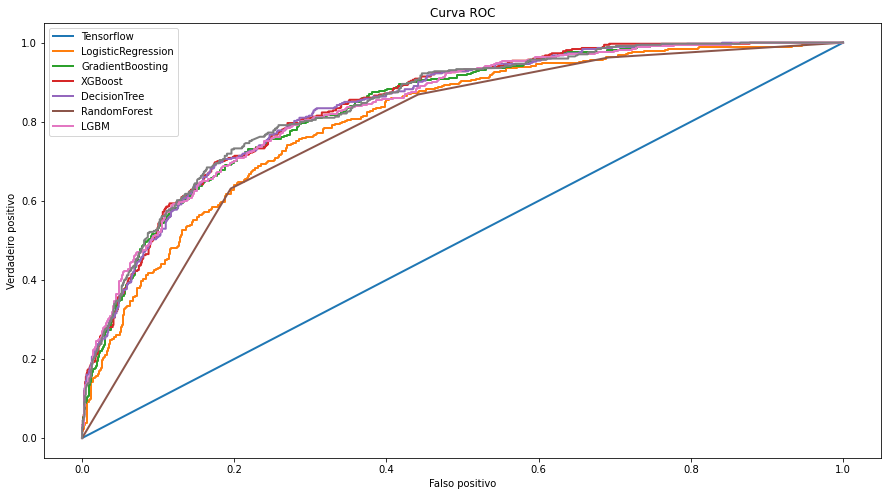

In [ ]:
#curva ROC tensorflow
y_probs_tensor = modelo_tensor.predict(X_test).ravel()
fpr_tensor, tpr_tensor, thresholds_tensor = roc_curve(y_test, y_probs_tensor)

#curva ROC regressão logistica
y_probs_regLog = modelo_logistica.predict_proba(X_test)[:,1]
fpr_regLog, tpr_regLog, thresholds_regLog = roc_curve(y_test, y_probs_regLog)

#curva ROC gradient boosting
y_probs_gradientBoosting = modelo_gradientBoosting.predict_proba(X_test)[:,1]
fpr_gradientBoosting, tpr_gradientBoosting, thresholds_gradientBoosting = roc_curve(y_test, y_probs_gradientBoosting)

#curva ROC XGBoost
y_probs_XGBoost = modelo_XGBoost.predict_proba(X_test)[:,1]
fpr_XGBoost, tpr_XGBoost, thresholds_XGBoost = roc_curve(y_test, y_probs_XGBoost)

#curva ROC DecisionTree
y_probs_DecisionTree = modelo_DecisionTree.predict_proba(X_test)[:,1]
fpr_DecisionTree, tpr_DecisionTree, thresholds_DecisionTree = roc_curve(y_test, y_probs_DecisionTree)

#curva ROC Random Forest
y_probs_RandomForest = modelo_RandomForest.predict_proba(X_test)[:,1]
fpr_RandomForest, tpr_RandomForest, thresholds_RandomForest = roc_curve(y_test, y_probs_RandomForest)

#curva ROC LGBM
y_probs_LGBM = modelo_LGBM.predict_proba(X_test)[:,1]
fpr_LGBM, tpr_LGBM, thresholds_LGBM = roc_curve(y_test, y_probs_LGBM)

#criando o gráfico
sns.color_palette("bright")
plt.figure(figsize=(15,8))

plt.plot([0,1], [0,1], lw=2)
#tensorflow
plt.plot(fpr_tensor, tpr_tensor, lw=2)
#logistic regression
plt.plot(fpr_regLog, tpr_regLog, lw=2)
#gradient boosting
plt.plot(fpr_gradientBoosting, tpr_gradientBoosting, lw=2)
#gradient XGBoost
plt.plot(fpr_XGBoost, tpr_XGBoost, lw=2)
#gradient DecisionTree
plt.plot(fpr_DecisionTree, tpr_DecisionTree, lw=2)
#gradient Random Forest
plt.plot(fpr_RandomForest, tpr_RandomForest, lw=2)
#gradient LGBM
plt.plot(fpr_LGBM, tpr_LGBM, lw=2)


plt.xlabel('Falso positivo')
plt.ylabel('Verdadeiro positivo')
plt.title('Curva ROC')
plt.legend(['Tensorflow','LogisticRegression','GradientBoosting', 'XGBoost','DecisionTree','RandomForest','LGBM'], loc='best')
plt.show()

# Comparando com a base real

No início desse estudo separamos cerca de 1% do nosso dataset (as 70 primeiras linhas), lembram?
Agora chegou o momento de utilizar, vamos aplicar nossos modelos de machine learning e comparar com a base real.

In [ ]:
#Realizando a previsão sobre as 70 primeiras linhas
pred_val_RandomForest = modelo_RandomForest.predict(validacao)
pred_val_LGBM = modelo_LGBM.predict(validacao)
pred_val_DecisionTree = modelo_DecisionTree.predict(validacao)
pred_val_XGBoost = modelo_XGBoost.predict(validacao)
pred_val_gradientBoosting = modelo_gradientBoosting.predict(validacao)
pred_val_tensor = modelo_tensor.predict(validacao)
pred_val_logistica = modelo_logistica.predict(validacao)

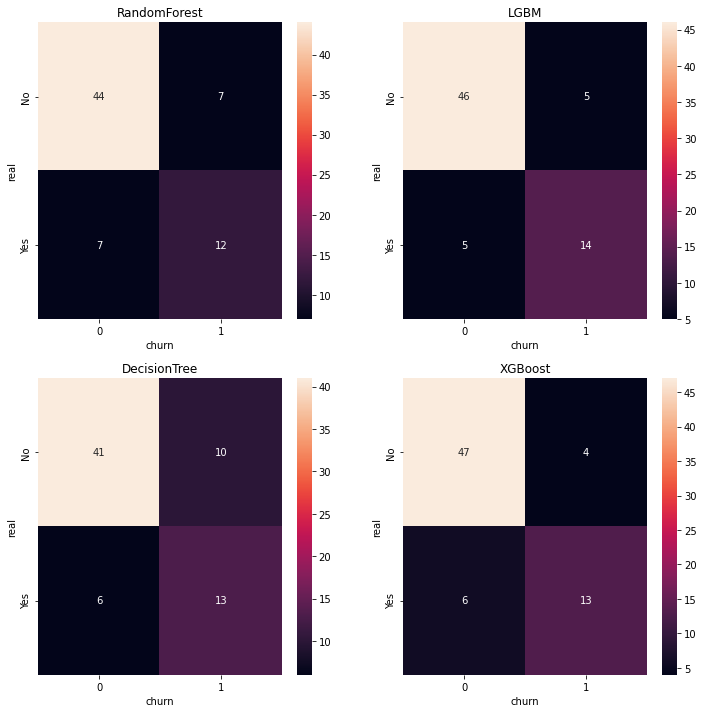

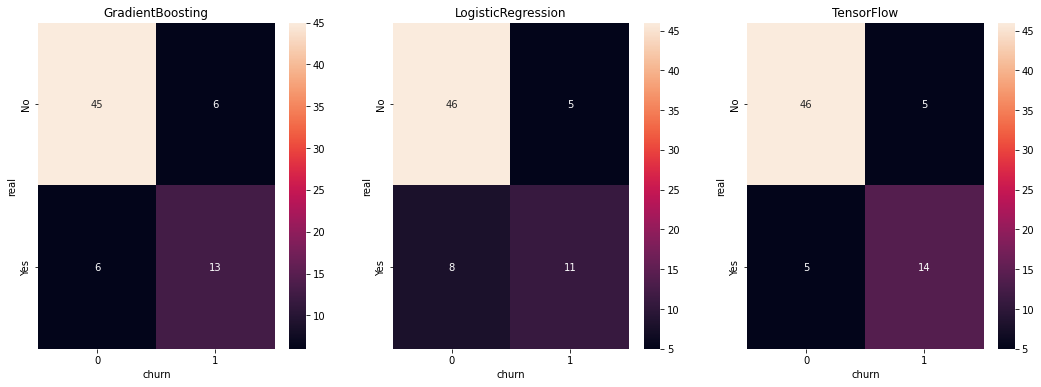

In [ ]:
#Criando uma função comparar as previsões feitas e a base real
def compararRealvsPrevisao(pred_val, y, df_validacao):
  """
    Realiza a comparação entre a base real e a base prevista pelo modelo de machine learning.
    
    Argumentos:
        pred_val: conjunto de dados com as previsões;
        y: variável de corte 0.5 ou 1;
        df_validacao: o dataframe com os dados reais.
        
    Return:
        o dataframe com a comparação.
    """
  y_pred = []

  for i in pred_val:
    if i==y:
      y_pred.append(1)
    else:
      y_pred.append(0)

  cliente = df_validacao['customerID']
  real = df_validacao['Churn']
  pred = list(pred_val.flatten())

  df = pd.DataFrame({'cliente':cliente, 'previsao': pred, 'real': real, 'churn': y_pred})

  return(df)

#todos esses criam como resultado 0 (não-churn) ou 1(churn)
df_RandomForest = compararRealvsPrevisao(pred_val_RandomForest, 1, df_validacao)
df_LGBM = compararRealvsPrevisao(pred_val_LGBM, 1, df_validacao)
df_DecisionTree = compararRealvsPrevisao(pred_val_DecisionTree, 1, df_validacao)
df_XGBoost = compararRealvsPrevisao(pred_val_XGBoost, 1, df_validacao)
df_gradientBoosting = compararRealvsPrevisao(pred_val_gradientBoosting, 1, df_validacao)
df_logistica = compararRealvsPrevisao(pred_val_logistica, 1, df_validacao)

#o tensor flow cria como resultado entre 0 e 1 - determinei que acima 0.5 é churn
y_pred = []

for i in pred_val_tensor:
  if i>=0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

cliente = df_validacao['customerID']
real = df_validacao['Churn']
pred = list(pred_val_tensor.flatten())

df_tensor = pd.DataFrame({'cliente':cliente, 'previsao': pred, 'real': real, 'churn': y_pred})

#matriz de confusão sobre a base real
df_RandomForest = pd.DataFrame(df_RandomForest, columns=['real', 'churn'])
confusion_matrix_RandomForest = pd.crosstab(df_RandomForest['real'],df_RandomForest['churn'], rownames=['real'], colnames=['churn'])

df_LGBM = pd.DataFrame(df_LGBM, columns=['real', 'churn'])
confusion_matrix_LGBM = pd.crosstab(df_LGBM['real'],df_LGBM['churn'], rownames=['real'], colnames=['churn'])

df_DecisionTree = pd.DataFrame(df_DecisionTree, columns=['real', 'churn'])
confusion_matrix_DecisionTree = pd.crosstab(df_DecisionTree['real'],df_DecisionTree['churn'], rownames=['real'], colnames=['churn'])

df_XGBoost = pd.DataFrame(df_XGBoost, columns=['real', 'churn'])
confusion_matrix_XGBoost = pd.crosstab(df_XGBoost['real'],df_XGBoost['churn'], rownames=['real'], colnames=['churn'])

df_gradientBoosting = pd.DataFrame(df_gradientBoosting, columns=['real', 'churn'])
confusion_matrix_gradientBoosting = pd.crosstab(df_gradientBoosting['real'],df_gradientBoosting['churn'], rownames=['real'], colnames=['churn'])

df_logistica = pd.DataFrame(df_logistica, columns=['real', 'churn'])
confusion_matrix_logistica = pd.crosstab(df_logistica['real'],df_logistica['churn'], rownames=['real'], colnames=['churn'])

df_tensor = pd.DataFrame(df_tensor, columns=['real', 'churn'])
confusion_matrix_tensor = pd.crosstab(df_tensor['real'],df_tensor['churn'], rownames=['real'], colnames=['churn'])


fig, axes = plt.subplots(2, 2, figsize=(12,12))
axes[0,0].set_title('RandomForest')    
axes[0,1].set_title('LGBM') 
axes[1,0].set_title('DecisionTree') 
axes[1,1].set_title('XGBoost') 

sns.heatmap(confusion_matrix_RandomForest, annot=True, ax=axes[0,0])
sns.heatmap(confusion_matrix_LGBM, annot=True, ax=axes[0,1])
sns.heatmap(confusion_matrix_DecisionTree, annot=True, ax=axes[1,0])
sns.heatmap(confusion_matrix_XGBoost, annot=True, ax=axes[1,1])
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(18,6))
axes[0].set_title('GradientBoosting')    
axes[1].set_title('LogisticRegression') 
axes[2].set_title('TensorFlow') 

sns.heatmap(confusion_matrix_gradientBoosting, annot=True, ax=axes[0])
sns.heatmap(confusion_matrix_logistica, annot=True, ax=axes[1])
sns.heatmap(confusion_matrix_tensor, annot=True, ax=axes[2])
plt.show()


# Considerações Finais

Os modelos de machine learning tiveram resultados parecidos, sendo que o TensorFlow teve um desempenho um pouco melhor. Mas aqui não nos aprofundamos nos parâmetros (hiperparâmetros) passados para cada modelo o que pode resultar em desempenhos melhores ou piores. Existem até formas automatizadas de otimizar os hiperparâmetros como: Grid Search e Random Search.

De forma geral, é muito interessante ver como os modelos ajudam bastante na identificação do churn e tem boa acurácia nos resultados com um ROC AUC de mais de 70%. 

Mais um item interessante que podemos observar são as variáveis que tiveram maior peso na decisão de churn, nesse caso é uma ferramenta do XGBoost e não sei se os outros modelos possuem, mas achei interessante compartilhar essa informação aqui, pois nos ajudaria a entender quais os motivos levam ao churn.

Existem vários formas de avaliar a importância das features, não sei qual o melhor, acredito que possa variar de acordo com o projeto, com o cliente.

Mas deixo aqui 2 formas de encontrar as variáveis e mais informações [clique aqui](https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/.).




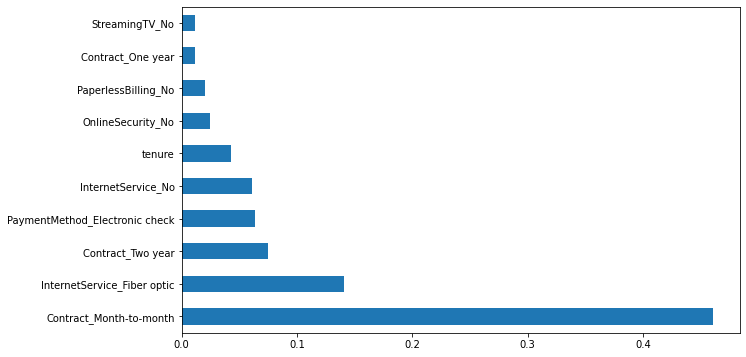

In [ ]:
pesos = pd.Series(modelo_XGBoost.feature_importances_, index=X.columns.values)
grafico = pesos.sort_values(ascending=False)[:10]

grafico.plot(kind='barh', figsize = (10,6))

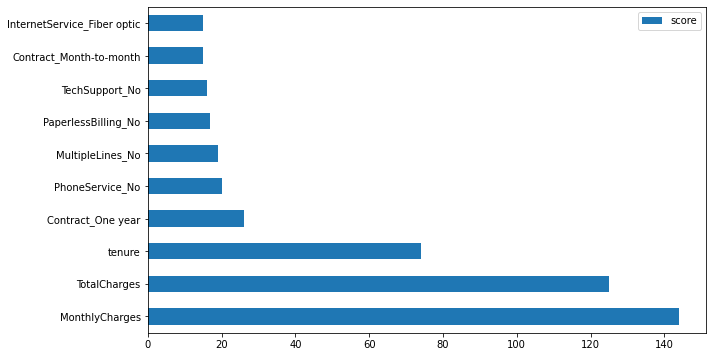

In [ ]:
#‘weight’ - the number of times a feature is used to split the data across all trees.
#‘gain’ - the average gain across all splits the feature is used in.
#‘cover’ - the average coverage across all splits the feature is used in.
#‘total_gain’ - the total gain across all splits the feature is used in.
#‘total_cover’ - the total coverage across all splits the feature is used in.

feature_important = modelo_XGBoost.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(10, columns="score").plot(kind='barh', figsize = (10,6)) ## plot top 10 features

# Ferramenta Extra

Duarnte os estudos descobri uma ferramenta extra, que ajuda e automatiza na escolha do melhor modelo de machine learning para os dados. Com poucas linhas é possível comparar modelos e executá-los. 

Acredito ser de suma importância saber como executar e construir cada modelo, principalmente para os cientistas de dados iniciantes, como eu. Mas para os que tem mais experiência essa ferramenta deve ser bastante útil, deixando o cientista mais livre para se dedicar a outros detalhes que possam entregar ainda mais valor ao cliente.

Essa ferramenta é o **PyCaret**, deixo aqui um [vídeo](https://www.youtube.com/watch?v=sL-4rWuEiVw.).

E aqui o link para o site da biblioteca [PyCaret](https://pycaret.org/.)


In [ ]:
from pycaret import classification

#uma cópia do arquivo .csv original
dados_pycaret = dados.copy()

#passamos a base completa e ele faz o tratamento de missings, id, label encode, etc
setup = classification.setup(data=dados_pycaret, target='Churn')



,Description,Value
0,session_id,2816
1,Target,Churn
2,Target Type,Binary
3,Label Encoded,"No: 0, Yes: 1"
4,Original Data,"(7043, 21)"
5,Missing Values,False
6,Numeric Features,2
7,Categorical Features,18
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
#comparação entre os modelos
#a execução desse comando foi demorada pra mim, por isso deixei comentada
#classification.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8059,0.8497,0.5198,0.6753,0.5870,0.4630,0.4700,28.993
lr,Logistic Regression,0.8028,0.8456,0.5458,0.6548,0.5951,0.4663,0.4698,33.663
ridge,Ridge Classifier,0.8020,0.0000,0.5122,0.6655,0.5786,0.4522,0.4589,2.679
ada,Ada Boost Classifier,0.8008,0.8506,0.5382,0.6525,0.5893,0.4595,0.4636,8.385
lightgbm,Light Gradient Boosting Machine,0.7911,0.8369,0.5252,0.6280,0.5716,0.4350,0.4383,1.576
rf,Random Forest Classifier,0.7909,0.8302,0.4710,0.6468,0.5448,0.4134,0.4223,7.626
et,Extra Trees Classifier,0.7876,0.8207,0.4687,0.6364,0.5393,0.4056,0.4139,15.107
dt,Decision Tree Classifier,0.7755,0.6900,0.5076,0.5899,0.5445,0.3970,0.3996,0.823
knn,K Neighbors Classifier,0.7740,0.7850,0.5153,0.5868,0.5477,0.3982,0.4003,4.406
dummy,Dummy Classifier,0.7343,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.108


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=2816, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
#esse foi o modelo com maior AUC e todos os hiperparâmetros
#GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
#                           learning_rate=0.1, loss='deviance', max_depth=3,
#                           max_features=None, max_leaf_nodes=None,
#                           min_impurity_decrease=0.0, min_impurity_split=None,
#                           min_samples_leaf=1, min_samples_split=2,
#                           min_weight_fraction_leaf=0.0, n_estimators=100,
#                           n_iter_no_change=None, presort='deprecated',
#                           random_state=2816, subsample=1.0, tol=0.0001,
#                           validation_fraction=0.1, verbose=0,
#                           warm_start=False)

#baseado na comparação entre modelos e escolhendo o que tenha maior AUC
#criando o modelo e fazendo o treinamento
dados_modelo = classification.create_model('gbc')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8053,0.8535,0.4733,0.6966,0.5636,0.4441,0.4579
1,0.7931,0.8500,0.5191,0.6355,0.5714,0.4369,0.4408
2,0.8012,0.8447,0.4962,0.6701,0.5702,0.4446,0.4531
3,0.8134,0.8582,0.5496,0.6857,0.6102,0.4895,0.4946
4,0.8053,0.8533,0.5191,0.6733,0.5862,0.4617,0.4683
5,0.8316,0.8733,0.5649,0.7400,0.6407,0.5333,0.5416
6,0.7972,0.8597,0.5267,0.6449,0.5798,0.4479,0.4519
7,0.8073,0.8221,0.5496,0.6667,0.6025,0.4769,0.4808
8,0.8256,0.8613,0.5573,0.7228,0.6293,0.5177,0.5252


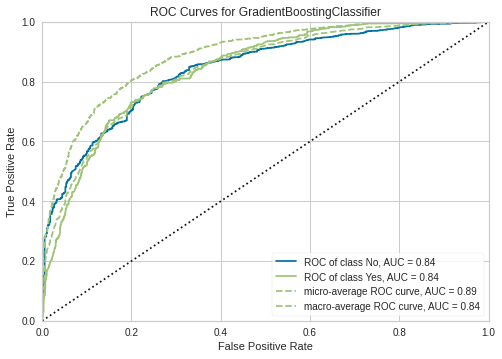

In [ ]:
#ROC-AUC
classification.plot_model(dados_modelo, plot='auc')

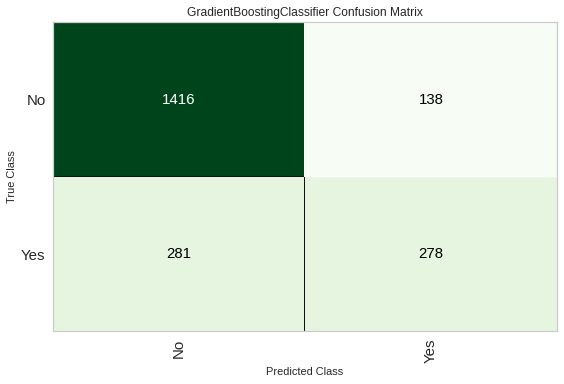

In [ ]:
#matriz confusão
classification.plot_model(dados_modelo, plot='confusion_matrix')

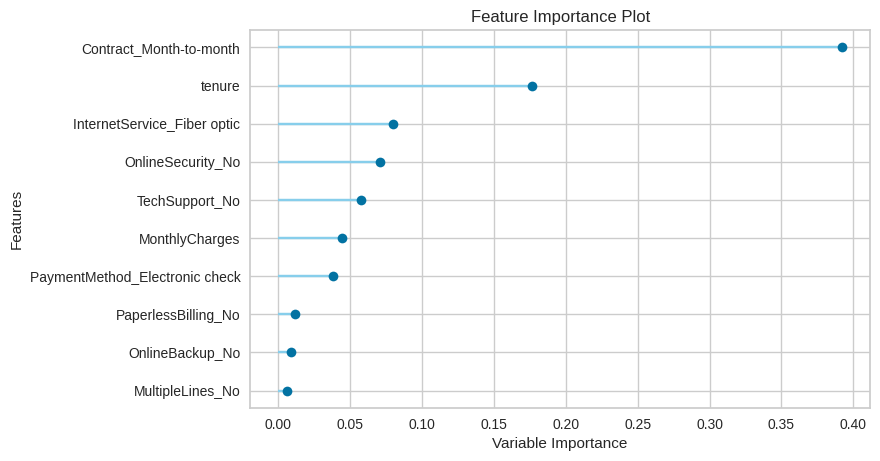

In [ ]:
#importância das variáveis
classification.plot_model(dados_modelo, plot='feature')

In [ ]:
#aqui vamos rodar a previsão sobre a nossa base
data_predict = classification.predict_model(dados_modelo, data = dados_pycaret)
#visualizando a previsão
data_predict

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0,0.8778,0,0,0,0,0


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Label,Score
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Yes,0.6693
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,No,No,0.9449
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,No,0.6997
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,No,0.9537
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Yes,0.6564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,No,0.9330
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,No,0.8612
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,No,0.6492
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,Yes,0.7169
